In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('/home/zero/Downloads/Theft_Data.csv')

In [3]:
X = data.iloc[ : , :-1]
Y = data.iloc[ : , 365]

In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()

There are 6968 samples in the training set and 2987 samples in the test set



/home/zero/documents/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [6]:
#Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
print('The accuracy of the RF classifier on test data is {:.2f} out of 1'.format(classifier.score(X_test, Y_test)))

The accuracy of the svm classifier on test data is 0.87 out of 1


In [7]:
Y_pred = classifier.predict(X_test)

In [8]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[2439  138]
 [ 259  151]]
             precision    recall  f1-score   support

          0       0.90      0.95      0.92      2577
          1       0.52      0.37      0.43       410

avg / total       0.85      0.87      0.86      2987

0.8670907264814195


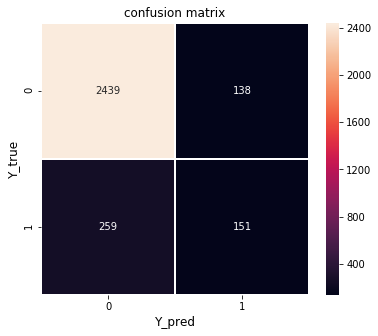

In [9]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(6,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="white",fmt=".0f",ax=ax)
plt.xlabel('Y_pred', size = 12)
plt.ylabel('Y_true', size =12)
plt.title('confusion matrix', size =12)
plt.savefig('confusion3.jpg')
plt.show()

In [10]:
print(len(Y_pred))

2987


In [11]:
a = []
for i in range(50):
    a.append(i)
print (len(a))
b = Y_test[:50]
c = Y_pred[:50]

50


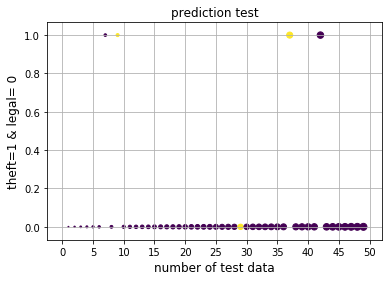

In [13]:
import numpy
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.gca()
ax.set_xticks(numpy.arange(0, 51, 5))
plt.xlabel('number of test data', size = 12)
plt.ylabel('theft=1 & legal= 0', size =12)
plt.title('prediction test', size =12)
plt.scatter(a,b,a,c)
plt.grid()
plt.savefig('prediction3.png')

5853    0
8119    0
6285    0
8698    0
2746    0
4663    0
7988    0
1167    1
5826    0
1194    1
7667    0
7745    0
3981    0
2577    0
3114    0
5697    0
5467    0
8079    0
6981    0
8907    0
5809    0
9785    0
6747    0
8552    0
1826    0
5477    0
8326    0
9864    0
1585    0
4238    0
       ..
5647    0
6725    0
202     1
2980    0
298     1
9530    0
6525    0
7207    0
5198    0
6223    0
8799    0
7154    0
2819    0
5243    0
4404    0
8413    0
8910    0
5425    0
6139    0
210     1
7606    0
9739    0
5299    0
5582    0
6415    0
7442    0
2345    0
4337    0
1153    1
3055    0
Name: 1, Length: 2987, dtype: int64
[0 0 0 ... 0 0 0]
